In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import csv

file = open('Incendies.csv', 'r')

# ouverture du fichier en lecture seule 'r'

TitreValeurs = [ line[6] for line in csv.reader(file, delimiter=';')] #On définit le délimiteur spécial

file.close()


valeurs = TitreValeurs[1:86] #on prend les valeurs de janvier (Ligne 1 à 86)
valeurs = np.array([int(v) for v in valeurs]) #on convertit les valeurs en entiers
valeurs = sorted(valeurs)[:-5] #on trie les valeurs et on enlève les 5 plus grandes

print(valeurs)



[1, 1, 1, 1, 1, 2, 2, 2, 3, 5, 5, 10, 10, 10, 10, 10, 10, 10, 15, 20, 20, 30, 30, 35, 50, 50, 60, 60, 100, 100, 100, 100, 100, 100, 150, 150, 150, 200, 200, 200, 200, 200, 200, 300, 300, 300, 300, 300, 500, 500, 500, 500, 500, 550, 600, 800, 800, 1000, 1000, 1000, 1000, 1000, 1500, 1920, 2000, 2000, 2500, 3000, 3470, 5000, 5000, 5000, 5000, 5000, 8634, 9700, 9817, 10000, 10000, 15300]


In [9]:
print( f"Nb valeurs = {len(valeurs)}")
print( f"Moyenne = {np.average(valeurs):.3f}")
print( f"Variance = {np.var(valeurs):.3f}")
print( f"Ecart-type = {np.std(valeurs):.3f}")

Nb valeurs = 80
Moyenne = 1491.312
Variance = 8705409.165
Ecart-type = 2950.493


In [10]:
Q0 = np.quantile(valeurs,0)
print(f"Quartile 0 = {Q0}")
Q1 = np.quantile(valeurs,1/4)
print(f"Quartile 1 = {Q1}")
Q2 = np.quantile(valeurs,2/4)
print(f"Quartile 2 = {Q2}")
Q3 = np.quantile(valeurs,3/4)
print(f"Quartile 3 = {Q3}")
Q4 = np.quantile(valeurs,1)
print(f"Quartile 4 = {Q4}")


Quartile 0 = 1
Quartile 1 = 20.0
Quartile 2 = 200.0
Quartile 3 = 1000.0
Quartile 4 = 15300


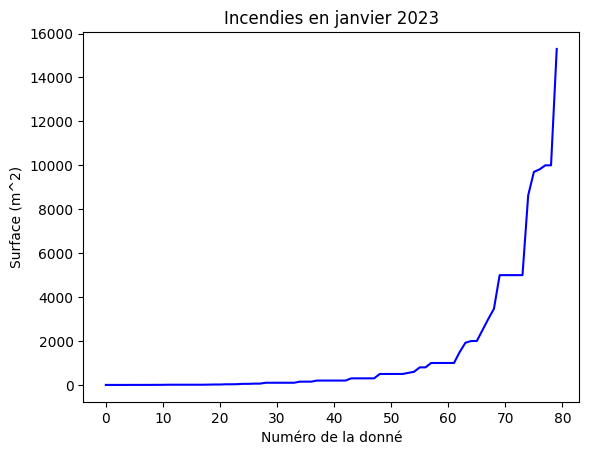

In [19]:
plt.figure(0)
I = np.array(range(len(valeurs)))
plt.plot(I, valeurs, 'b-') # 'b+' pour lesd croix verticales bleues
plt.xlabel("Numéro de la donné")
plt.ylabel("Surface (m^2)")
plt.title("Incendies en janvier 2023")
plt.show()

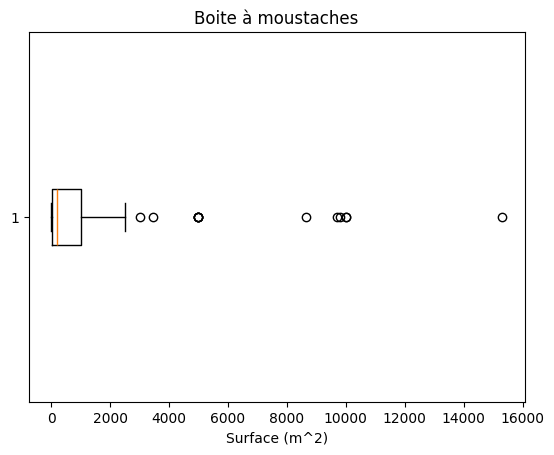

In [16]:
plt.figure(1)
plt.boxplot(valeurs, vert=False, whis=2) #Boite à moustache horizontale (vert=F)
plt.xlabel("Surface (m^2)")
plt.title("Boite à moustaches")
plt.show()

Indice de Gini = 0.7580351829344956


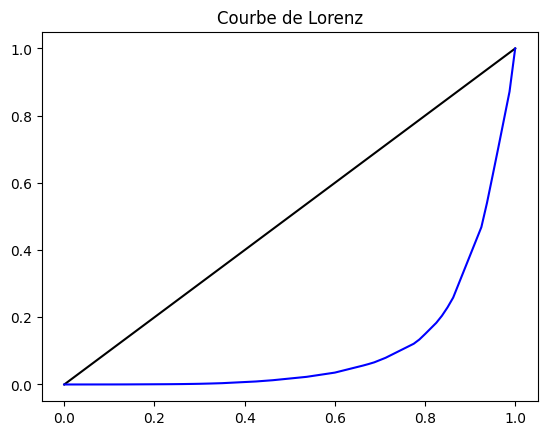

In [ ]:
def gini(tValeurs: list) -> float:
    n = len(tValeurs) #nombre de valeurs
    valTriees = sorted(tValeurs) #valeurs triées dans l'ordre croissant
    numerateur = 2 * sum([i * valTriees[i] for i in range(n)])
    denominateur = n * sum(valTriees)
    return numerateur / denominateur - (n + 1) / n

print(f"Indice de Gini = {gini(valeurs)}")

def courbe2Lorenz(tValeurs: list) -> None:
    Y = np.array([0]+tValeurs)
    X = np.linspace(0, 1, len(Y))
    Y_lorenz = Y.cumsum() / Y.sum()
    plt.figure(3)
    plt.plot(X,X, 'k-', X, Y_lorenz, 'b-') # On trace X, X pour avoir la diagonale noire
    plt.title("Courbe de Lorenz")
    plt.show()

courbe2Lorenz(valeurs)

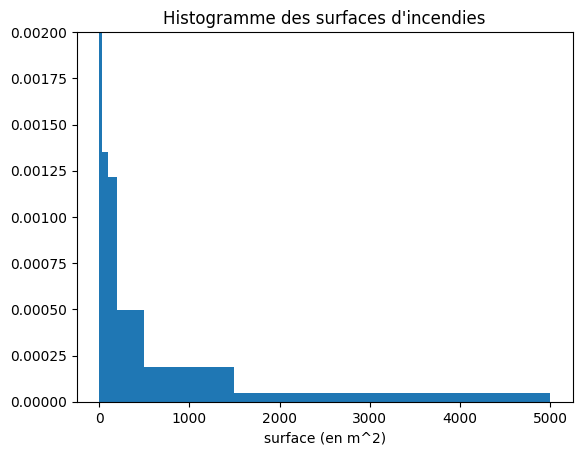

In [20]:
limClasses = np.array( [1, 5, 15, 30, 100, 200, 500, 1500, 5000]) # On retire les valeurs extrêmes
effectifs, _ = np.histogram(valeurs, bins=limClasses)
densite, _ = np.histogram(valeurs, bins=limClasses, density=True)

plt.figure(2)
plt.ylim(0,0.002) # Valeurs limites des ordonnées (ici on tronque -> vmax = 0.03)
plt.hist(valeurs, bins=limClasses, density=True)
plt.xlabel('surface (en m^2)')
plt.title("Histogramme des surfaces d'incendies") #Noter les " pour avoir ' 
plt.show()

In [21]:
def moyennePonderee(tEffectifs: list, tValeurs: list) -> float:
    somme = 0
    totalEffectif = sum(tEffectifs)
    for i in range(len(tEffectifs)):
        somme += tEffectifs[i] * tValeurs[i]
    return somme / totalEffectif

def variancePonderee(tEffectifs: list, tValeurs: list) -> float:
    moyenne = moyennePonderee(tEffectifs, tValeurs)
    totalEffectif = sum(tEffectifs)
    somme = 0
    for i in range(len(tEffectifs)):
        somme += tEffectifs[i] * (tValeurs[i] - moyenne)**2
    return somme / totalEffectif

milieuClasses = [(limClasses[i] + limClasses[i+1]) / 2 for i in range(len(limClasses)-1)]

print(f"Moyenne avec les classes = {moyennePonderee(effectifs, milieuClasses)}")
print(f"Variance avec les classes = {variancePonderee(effectifs, milieuClasses)}")

Moyenne avec les classes = 795.1283783783783
Variance avec les classes = 1291177.277437911
